In [2]:
%matplotlib inline

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [7]:
data_df = pd.read_csv("insurance.csv")
data_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
data_df.shape

(1338, 7)

In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#mpg_df['hp'] = mpg_df['hp'].astype('float64')

In [12]:
data_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


for charges mean is more median and it looks rights skewed data.Rest of the data loks okay.We can get a better picture by ploting a histogram on charges.

In [13]:
data_df['bmi'].std

<bound method Series.std of 0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64>

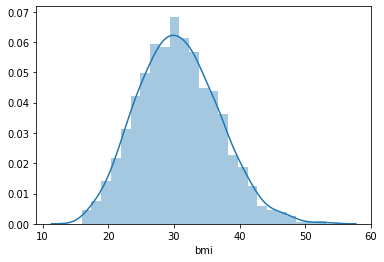

In [15]:
sns.distplot(data_df['bmi'])

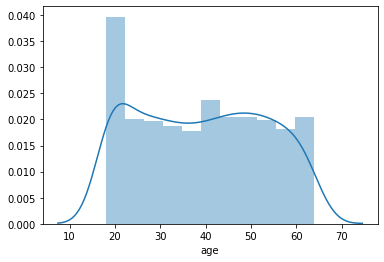

In [16]:
sns.distplot(data_df['age'])

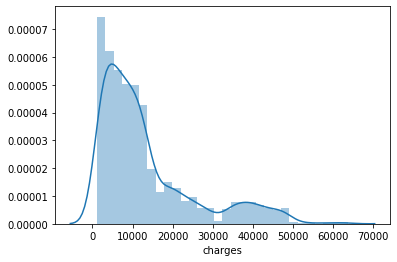

In [17]:
sns.distplot(data_df['charges'])

From this diagram it is clear that charges is right skewed.

In [18]:
data_df["age"].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

In [20]:
data_df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [21]:
data_df["charges"].value_counts()

1639.56310     2
8825.08600     1
43254.41795    1
5257.50795     1
1980.07000     1
              ..
12269.68865    1
6360.99360     1
7371.77200     1
16420.49455    1
34254.05335    1
Name: charges, Length: 1337, dtype: int64

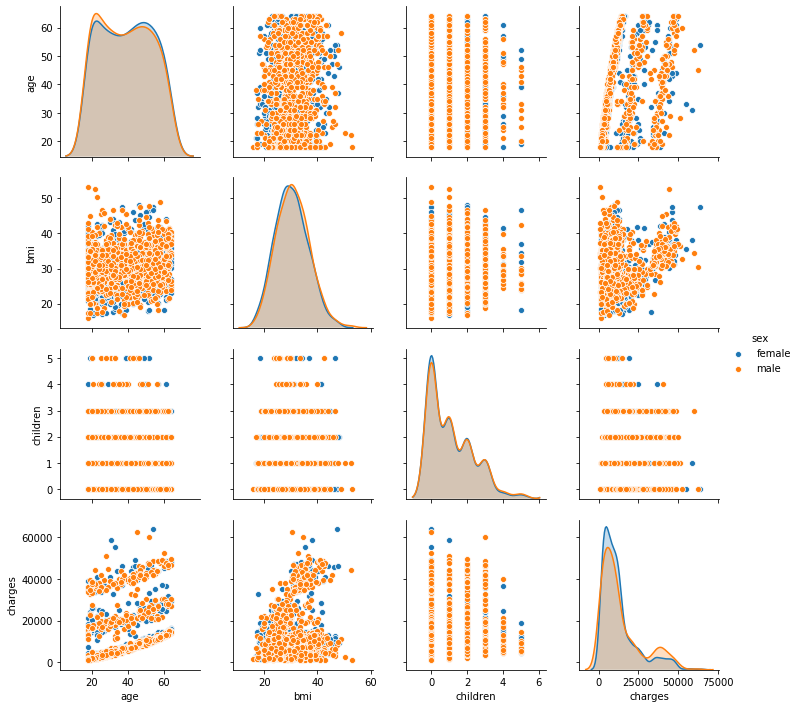

In [27]:
sns.pairplot(data_df,diag_kind='kde',hue='sex')

All the data looks overlap.

In [30]:
print("Data_quantile(25%):",data_df.quantile(q=0.25))  # Prints the value below which 25% of the data lies

Data_quantile(25%): age           27.00000
bmi           26.29625
children       0.00000
charges     4740.28715
Name: 0.25, dtype: float64


In [31]:
print("Data_quantile(50%):",data_df.quantile(q=0.50))  # Prints the value below which 50% of the data lies

Data_quantile(50%): age           39.000
bmi           30.400
children       1.000
charges     9382.033
Name: 0.5, dtype: float64


In [32]:
print("Data_quantile(75%):",data_df.quantile(q=0.75))  # Prints the value below which 75% of the data lies

Data_quantile(75%): age            51.000000
bmi            34.693750
children        2.000000
charges     16639.912515
Name: 0.75, dtype: float64


Text(0.7, 11899.63, 'IQR')

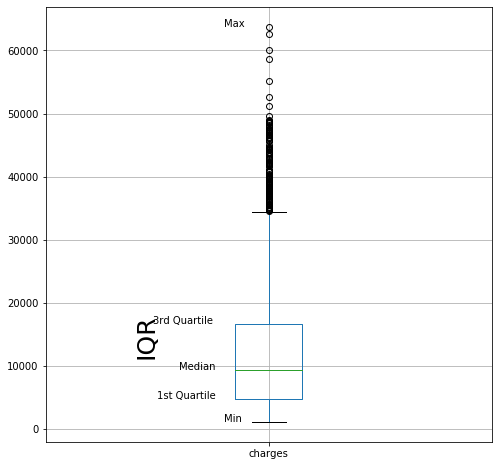

In [37]:
# Create boxplot for column="charges"
data_df.boxplot(column="charges",return_type='axes',figsize=(8,8))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.74, y=16639.912515, s="3rd Quartile")
plt.text(x=0.8, y=9382.033, s="Median")
plt.text(x=0.75, y=4740.28715, s="1st Quartile")
plt.text(x=0.9, y=1121.873900, s="Min")
plt.text(x=0.9, y=63770.428010, s="Max")
plt.text(x=0.7, y=11899.63, s="IQR", rotation=90, size=25)

In [ ]:
#The boxplot of charges column showing right skewed and it is clear that there is an outlier

Text(0.7, 24.0, 'IQR')

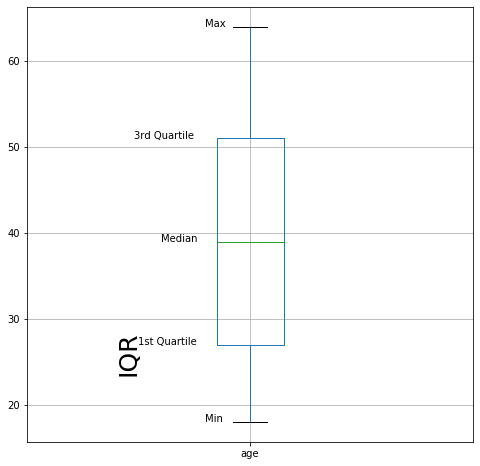

In [39]:
# Create boxplot for column="charges"
data_df.boxplot(column="age",return_type='axes',figsize=(8,8))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.74, y=51.000000, s="3rd Quartile")
plt.text(x=0.8, y=39.00000, s="Median")
plt.text(x=0.75, y=27.000000, s="1st Quartile")
plt.text(x=0.9, y=18.00, s="Min")
plt.text(x=0.9, y=64.00, s="Max")
plt.text(x=0.7, y=24.00, s="IQR", rotation=90, size=25)

In [ ]:
#there is no outlier for age columns

In [40]:
data_df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Text(0.7, 24.0, 'IQR')

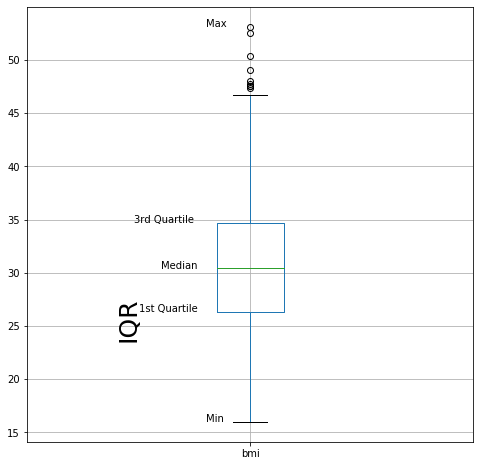

In [43]:
# Create boxplot for column="charges"
data_df.boxplot(column="bmi",return_type='axes',figsize=(8,8))

# create text(x=0.74, y=22.25, s="3rd Quartile")like Median, 1st Quartile,Min,Max,IQR:
plt.text(x=0.74, y=34.693750, s="3rd Quartile")
plt.text(x=0.8, y=30.400000, s="Median")
plt.text(x=0.75, y=26.296250, s="1st Quartile")
plt.text(x=0.9, y=15.960000, s="Min")
plt.text(x=0.9, y=53.130000, s="Max")
plt.text(x=0.7, y=24.00, s="IQR", rotation=90, size=25)

In [44]:
#The outlier is 47.29 and looking at the boxplot of bmi it seems we have a outlier.

In [45]:
data_df.groupby([data_df['children']]).count()

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,574,574,574,574,574,574
1,324,324,324,324,324,324
2,240,240,240,240,240,240
3,157,157,157,157,157,157
4,25,25,25,25,25,25
5,18,18,18,18,18,18


In [46]:
data_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [48]:
data_df.groupby(data_df['sex']).count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


In [66]:
data_df.groupby(data_df['sex']).count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
female,662,662,662,662,662,662
male,676,676,676,676,676,676


In [75]:
data_df[(data_df['smoker']=='yes') & (data_df['sex']=='male')].count()

age         159
sex         159
bmi         159
children    159
smoker      159
region      159
charges     159
dtype: int64

In [ ]:
#the 

In [50]:
data_df.skew() 

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

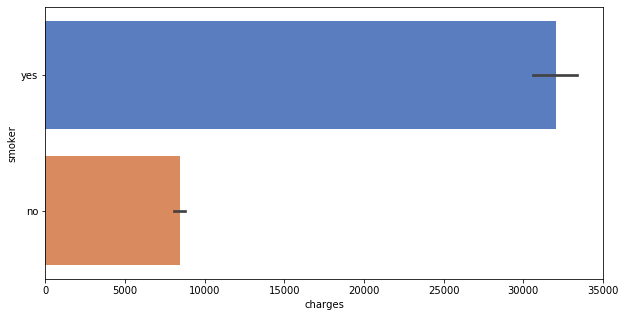

In [53]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='charges', y='smoker', data=data_df, palette='muted')  # barplot

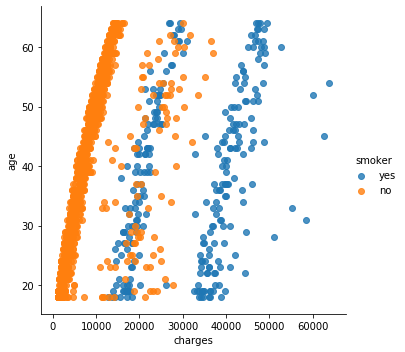

In [86]:
sns.lmplot(x= 'charges', y='age',hue='smoker',data=data_df, scatter=True,fit_reg=False )

In [ ]:
#from the barplot it looks the charges for smoker is more than charges for nonsmoker

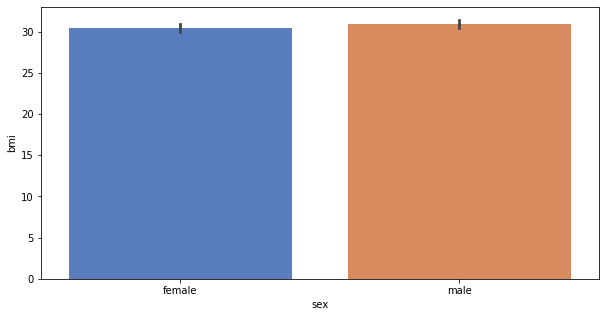

In [60]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='sex', y='bmi', data=data_df, palette='muted')  # barplot

In [ ]:
#from the graph,it is clear that there is no significant difference in bmi count between male and femaile.

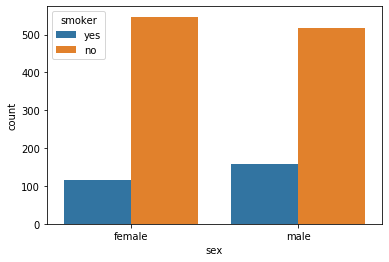

In [87]:
sns.countplot(x='sex',hue='smoker',data= data_df)

In [ ]:
#looks like male smoker is more than female smoker.

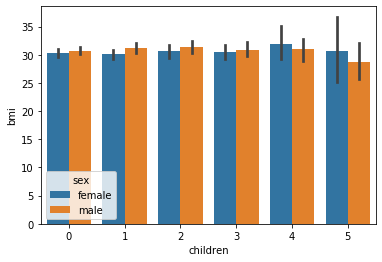

In [93]:
sns.barplot(x='children', y='bmi',hue='sex' ,data= data_df)

In [ ]:
#from the graph it loks like the distribution of bmi acorss  women with no children ,one children and 2 children looks same.there is not much difference.